In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [28]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
iris=load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [10]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)

In [11]:
df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [12]:
df['target']=iris.target

In [13]:
df.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


Text(0, 0.5, 'petal width')

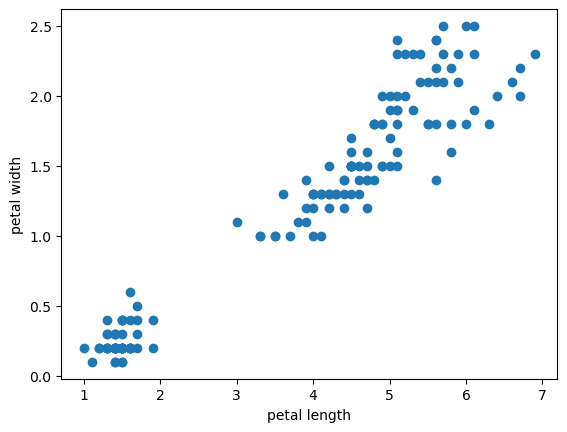

In [15]:
plt.scatter(df['petal length (cm)'],df['petal width (cm)'])
plt.xlabel('petal length')
plt.ylabel('petal width')

In [16]:
df['target'].unique()

array([0, 1, 2])

In [21]:
scaler=MinMaxScaler()
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)']=scaler.transform(df[['petal length (cm)']])
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)']=scaler.transform(df[['petal width (cm)']])
df.head(4)
dfn=df.drop(['sepal length (cm)','sepal width (cm)','target'],axis='columns')

In [20]:
dfn.head(3)

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667


In [25]:
df_n=df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns')

In [26]:
df_n.head(4)

,petal length (cm),petal width (cm),target
0,0.067797,0.041667,0
1,0.067797,0.041667,0
2,0.050847,0.041667,0
3,0.084746,0.041667,0


In [31]:
km = KMeans(n_clusters=3)
y_predict=km.fit_predict(dfn[['petal length (cm)','petal length (cm)']])

C:\Users\SMuralidhar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SMuralidhar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
dfn['cluster']=y_predict

In [34]:
dfn[50:54]

,petal length (cm),petal width (cm),cluster
50,0.627119,0.541667,2
51,0.593220,0.583333,2
52,0.661017,0.583333,2
53,0.508475,0.500000,2


In [39]:
df0=dfn[dfn['cluster']==0]
df1=dfn[dfn['cluster']==1]
df2=dfn[dfn['cluster']==2]

Text(0, 0.5, 'petal length (cm)')

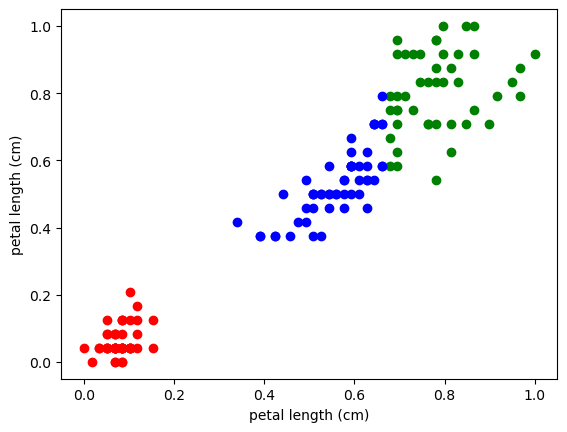

In [41]:
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='green')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='red')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='blue')
plt.xlabel('petal length (cm)')
plt.ylabel('petal length (cm)')



In [40]:
df0=dfn[dfn['cluster']==0]
df1=dfn[dfn['cluster']==1]
df2=dfn[dfn['cluster']==2]

In [52]:
sse=[]
k_rng= range(1,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)','petal length (cm)']])
    sse.append(km.inertia_)

C:\Users\SMuralidhar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SMuralidhar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\SMuralidhar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\SMuralidhar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it 

Text(0, 0.5, 'SSE')

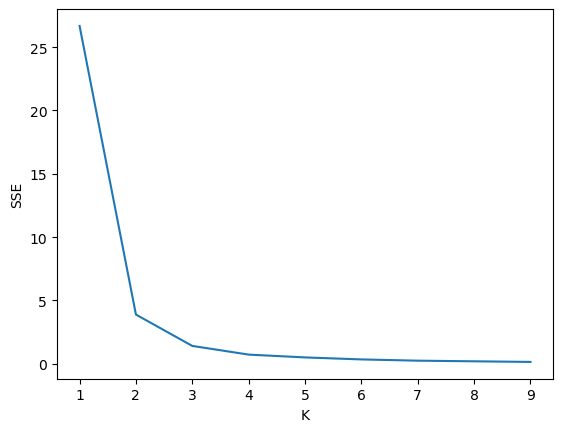

In [55]:
plt.plot(k_rng,sse)
plt.xlabel('K')
plt.ylabel('SSE')